# DRL-Finance Data Framework Showcase

This notebook demonstrates the capabilities of the DRL-Finance data framework, including:

1. Data downloading and preprocessing
2. Technical indicator calculation
3. Asset universe selection
4. Data normalization
5. Preparing training datasets
6. Visualizing financial data

Let's start by importing the necessary modules.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Add project root to path
if '..' not in sys.path:
    sys.path.append('..')

# Import data modules
from data.data_manager import DataManager
from data.sources.finrl_yahoo import FinRLYahoo
from data.sources.finrl_data import FinRLData
from data.processors.feature_engineering import FeatureEngineer
from data.processors.normalization import Normalizer
from data.processors.universe_selection import UniverseSelector
from data.market.market_data import MarketData
from data.market.universe import Universe

# Configure plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

## 1. Initialize the Data Manager

We'll start by initializing the DataManager with a Yahoo Finance data source. This will be our main interface to the data framework.

In [2]:
# Initialize Yahoo Finance data source
data_source = FinRLData()

# Create data manager
data_manager = DataManager(
    data_source=data_source,
    data_dir='../data_storage'
)

print("Data manager initialized successfully!")

Data manager initialized successfully!


## 2. Download Financial Data

Let's download some financial data for a set of popular tech stocks.

In [3]:
# Define ticker list and date range
tech_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'NFLX']

# Define date range (2 years of data)
end_date = datetime.now().date()
start_date = end_date - timedelta(days=365*2)

# Download data
market_data = data_manager.download_data(
    ticker_list=tech_tickers,
    start_date=start_date,
    end_date=end_date,
    time_interval='1d',
    include_indicators=True,
    dataset_name='tech_stocks_showcase'
)

# Display basic info
print(f"Downloaded data for {len(tech_tickers)} tickers")
print(f"Date range: {market_data.start_date} to {market_data.end_date}")
print(f"Number of data points: {len(market_data.data)}")
print(f"Number of features: {len(market_data.data.columns)}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-03-18 00:00:00 -> 2023-03-19 00:00:00)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-03-19 00:00:00 -> 2023-03-20 00:00:00)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%

KeyboardInterrupt: 

Let's examine the data we've downloaded.

In [4]:
# Display the first few rows of the data
market_data.data.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AAPL_macd,AAPL_macds,AAPL_macdh,AAPL_rsi_14,AAPL_cci_30,...,NFLX_Volume,NFLX_macd,NFLX_macds,NFLX_macdh,NFLX_rsi_14,NFLX_cci_30,NFLX_dx_30,NFLX_close_20_sma,NFLX_close_50_sma,date
0,146.334266,151.611053,146.225364,148.967712,84457100,0.000000,0.000000,0.000000,NaN,NaN,...,6292400,0.000000,0.000000,0.000000,NaN,NaN,NaN,293.510010,293.510010,2023-03-13
1,149.769610,151.868439,148.601398,151.066528,73695900,0.047089,0.026160,0.020928,100.000000,66.666667,...,5956700,0.032083,0.017824,0.014259,100.000000,66.666667,NaN,294.225006,294.225006,2023-03-14
2,149.680523,151.719954,148.423199,151.462555,77167900,0.072281,0.045062,0.027219,100.000000,51.090985,...,9215300,0.315318,0.139748,0.175571,100.000000,100.000000,100.000000,297.413340,297.413340,2023-03-15
3,150.640815,154.897886,150.126002,154.293976,76161100,0.184195,0.092194,0.092001,100.000000,133.333333,...,7903700,0.662787,0.316929,0.345858,100.000000,116.192635,100.000000,300.575005,300.575005,2023-03-16
4,154.521703,155.175117,152.739671,153.452484,98944600,0.207645,0.126538,0.081107,84.679453,97.070124,...,6918800,0.576606,0.394177,0.182429,68.995095,52.572895,82.845331,301.160004,301.160004,2023-03-17


## 3. Visualize Price Data

Let's visualize the closing prices for our tech stocks.

            AAPL  MSFT  GOOGL  AMZN  META  TSLA  NVDA  NFLX
date                                                       
2023-03-13   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN
2023-03-14   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN
2023-03-15   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN
2023-03-16   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN
2023-03-17   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN
Setting index
            AAPL  MSFT  GOOGL  AMZN  META  TSLA  NVDA  NFLX
date                                                       
2023-03-13   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN
2023-03-14   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN
2023-03-15   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN
2023-03-16   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN
2023-03-17   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN


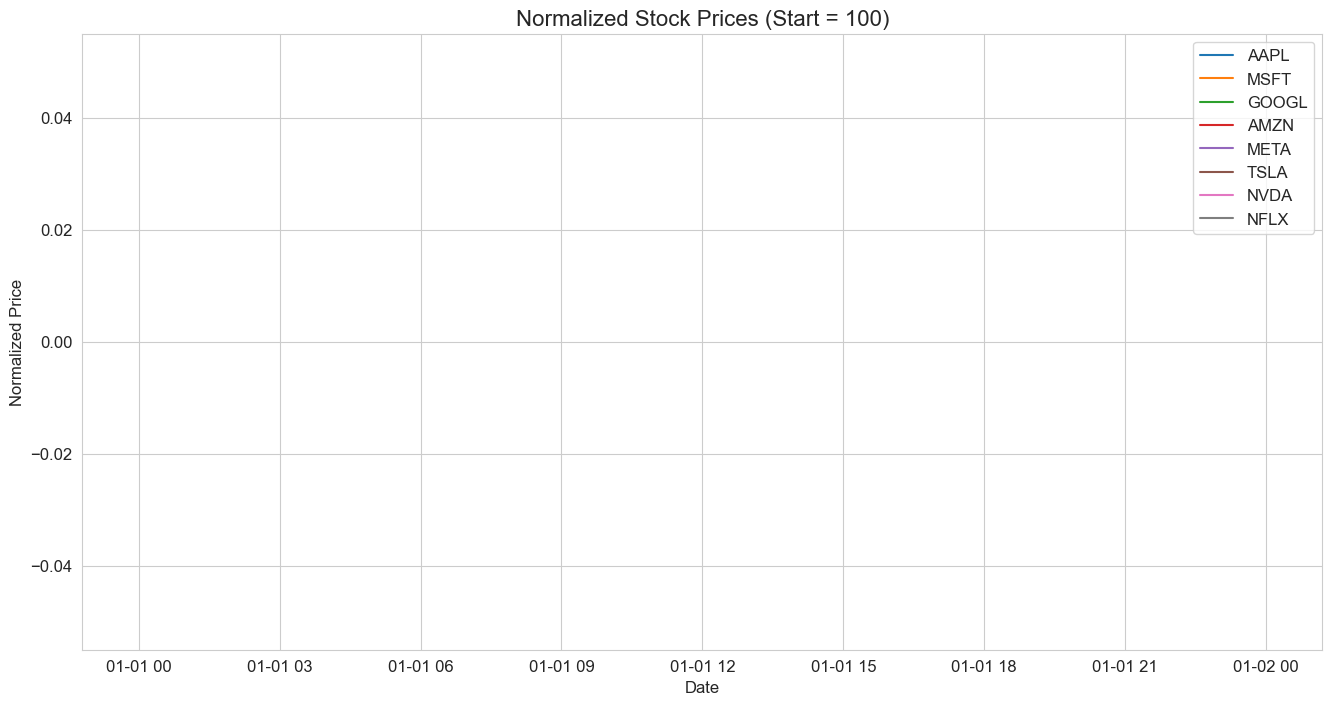

In [5]:
# Get price matrix (dates as index, tickers as columns)
price_df = market_data.get_price_matrix()

price_df.head()

# Normalize prices to start at 100 for easier comparison
normalized_prices = price_df.div(price_df.iloc[0]) * 100

# Plot
plt.figure(figsize=(16, 8))
for ticker in tech_tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)

plt.title('Normalized Stock Prices (Start = 100)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

## 4. Explore Technical Indicators

Our data framework automatically calculates various technical indicators. Let's explore some of them for a single stock.

Technical indicators available for AAPL:
- AAPL_macd
- AAPL_macds
- AAPL_macdh
- AAPL_rsi_14
- AAPL_cci_30
- AAPL_dx_30
- AAPL_close_20_sma
- AAPL_close_50_sma


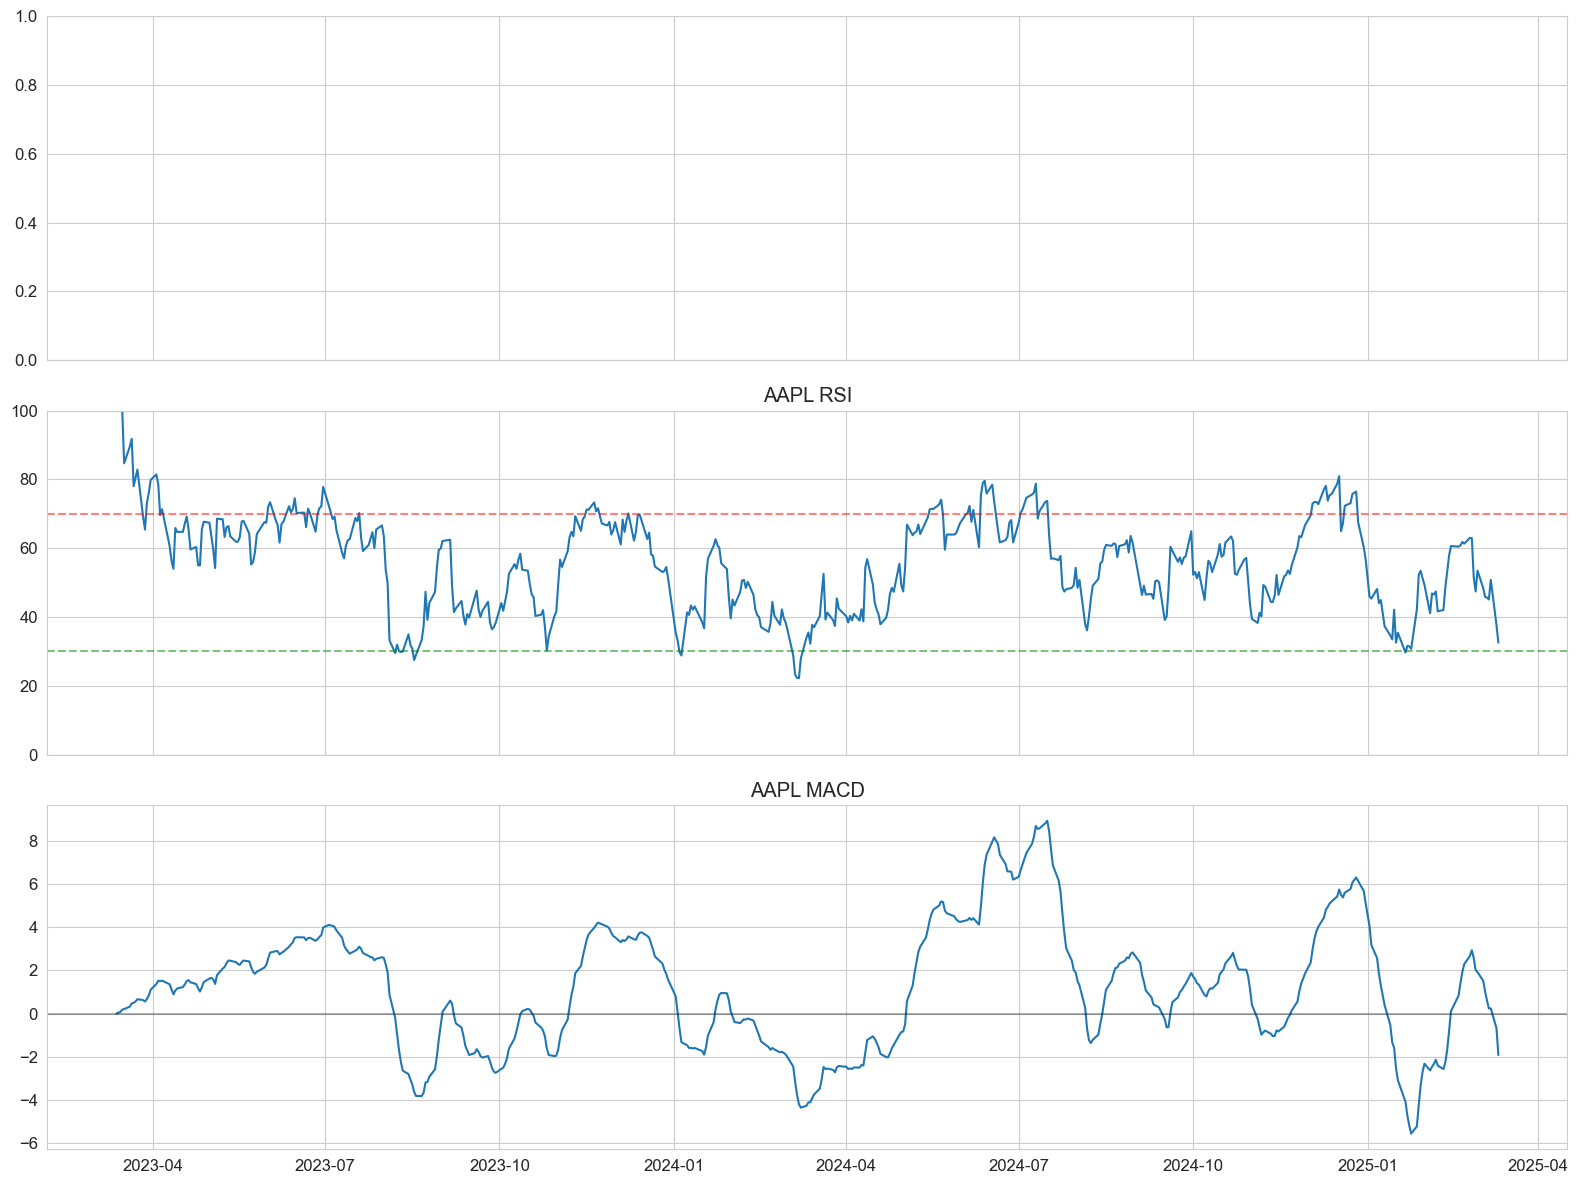

In [6]:
# Select a single stock for analysis
ticker = 'AAPL'
ticker_data = market_data.get_ticker_data(ticker)

# Get list of technical indicators for this ticker
indicator_cols = [col for col in ticker_data.columns if 
                 any(ind in col for ind in ['rsi', 'macd', 'sma', 'cci', 'dx'])]

print(f"Technical indicators available for {ticker}:")
for col in indicator_cols:
    print(f"- {col}")

# Create a plot with price and a few key indicators
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# Plot 1: Price and SMAs
close_col = f"{ticker}_close"
sma20_col = next((col for col in indicator_cols if 'close_20_sma' in col), None)
sma50_col = next((col for col in indicator_cols if 'close_50_sma' in col), None)

if close_col in ticker_data.columns:
    axes[0].plot(ticker_data['date'], ticker_data[close_col], label='Close Price')
    
    if sma20_col and sma20_col in ticker_data.columns:
        axes[0].plot(ticker_data['date'], ticker_data[sma20_col], label='20-day SMA', alpha=0.7)
        
    if sma50_col and sma50_col in ticker_data.columns:
        axes[0].plot(ticker_data['date'], ticker_data[sma50_col], label='50-day SMA', alpha=0.7)
        
    axes[0].set_title(f"{ticker} Price and Moving Averages")
    axes[0].legend()
    axes[0].grid(True)

# Plot 2: RSI
rsi_col = next((col for col in indicator_cols if 'rsi' in col), None)
if rsi_col and rsi_col in ticker_data.columns:
    axes[1].plot(ticker_data['date'], ticker_data[rsi_col])
    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].set_title(f"{ticker} RSI")
    axes[1].set_ylim(0, 100)
    axes[1].grid(True)

# Plot 3: MACD
macd_col = next((col for col in indicator_cols if 'macd' in col), None)
if macd_col and macd_col in ticker_data.columns:
    axes[2].plot(ticker_data['date'], ticker_data[macd_col])
    axes[2].axhline(0, color='black', linestyle='-', alpha=0.3)
    axes[2].set_title(f"{ticker} MACD")
    axes[2].grid(True)

plt.tight_layout()
plt.show()

## 5. Asset Universe Selection

The Universe Selector can be used to select subsets of assets based on different criteria. Let's see it in action.

In [7]:
# Create a UniverseSelector instance
selector = UniverseSelector(selection_method="volatility")

# Select highest volatility stocks
high_vol_tickers = selector.select_universe(
    df=market_data.data,
    ticker_list=tech_tickers,
    n_assets=4,  # Select top 4
    lookback_period=252  # Use one year
)

# Select lowest volatility stocks
selector.selection_method = "volatility"
low_vol_tickers = selector.select_universe(
    df=market_data.data,
    ticker_list=tech_tickers,
    n_assets=4,  # Select top 4
    lookback_period=252,  # Use one year
    high_vol=False  # Select lowest volatility
)

print("High volatility stocks:", high_vol_tickers)
print("Low volatility stocks:", low_vol_tickers)

# Create universes
high_vol_universe = data_manager.create_universe(
    ticker_list=high_vol_tickers,
    name="high_vol_tech",
    save_to_disk=True
)

low_vol_universe = data_manager.create_universe(
    ticker_list=low_vol_tickers,
    name="low_vol_tech",
    save_to_disk=True
)

# Compare returns of high vol vs low vol portfolios
high_vol_data = market_data.slice_by_tickers(high_vol_tickers)
low_vol_data = market_data.slice_by_tickers(low_vol_tickers)

high_vol_prices = high_vol_data.get_price_matrix()
low_vol_prices = low_vol_data.get_price_matrix()

# Calculate equal-weighted portfolio values
high_vol_portfolio = high_vol_prices.mean(axis=1) / high_vol_prices.mean(axis=1).iloc[0] * 100
low_vol_portfolio = low_vol_prices.mean(axis=1) / low_vol_prices.mean(axis=1).iloc[0] * 100

# Plot comparison
plt.figure(figsize=(14, 7))
plt.plot(high_vol_portfolio.index, high_vol_portfolio, label='High Volatility Portfolio')
plt.plot(low_vol_portfolio.index, low_vol_portfolio, label='Low Volatility Portfolio')
plt.title('High vs Low Volatility Portfolios', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Start = 100)')
plt.legend()
plt.grid(True)
plt.show()

TypeError: UniverseSelector.select_universe() got an unexpected keyword argument 'high_vol'

## 6. Data Normalization

Let's demonstrate the data normalization capabilities.

In [ ]:
# Create a normalizer
normalizer = Normalizer(method="minmax")

# Get data for a single stock
ticker = 'AAPL'
ticker_data = market_data.get_ticker_data(ticker)

# Select columns to normalize
price_col = f"{ticker}_close"
volume_col = f"{ticker}_volume"
cols_to_normalize = [price_col, volume_col]

# Create a copy of the data
data_to_normalize = ticker_data.copy()

# Normalize the data
normalized_data = normalizer.fit_transform(data_to_normalize, cols_to_normalize)

# Plot original vs normalized data
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Original price
axes[0, 0].plot(ticker_data['date'], ticker_data[price_col])
axes[0, 0].set_title(f"Original {ticker} Price")
axes[0, 0].grid(True)

# Normalized price
axes[0, 1].plot(normalized_data['date'], normalized_data[price_col])
axes[0, 1].set_title(f"Normalized {ticker} Price")
axes[0, 1].grid(True)

# Original volume
axes[1, 0].plot(ticker_data['date'], ticker_data[volume_col])
axes[1, 0].set_title(f"Original {ticker} Volume")
axes[1, 0].grid(True)

# Normalized volume
axes[1, 1].plot(normalized_data['date'], normalized_data[volume_col])
axes[1, 1].set_title(f"Normalized {ticker} Volume")
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## 7. Preparing Training and Testing Data

Now let's demonstrate how to prepare data for training and testing a reinforcement learning model.

In [ ]:
# Prepare training and testing data
train_data, test_data = data_manager.prepare_training_data(
    market_data=market_data,
    universe=high_vol_universe,  # Use the high volatility universe
    normalize=True,
    train_ratio=0.8,
    include_indicators=True
)

# Print information about the training and testing data
print(f"Training data: {len(train_data.data)} samples")
print(f"Testing data: {len(test_data.data)} samples")
print(f"Number of features: {len(train_data.data.columns)}")
print(f"Training period: {train_data.start_date} to {train_data.end_date}")
print(f"Testing period: {test_data.start_date} to {test_data.end_date}")

# Plot training and testing periods (price data)
train_prices = train_data.get_price_matrix()
test_prices = test_data.get_price_matrix()

# Create equal-weighted portfolio values
train_portfolio = train_prices.mean(axis=1) / train_prices.mean(axis=1).iloc[0] * 100
test_portfolio = test_prices.mean(axis=1) / test_prices.mean(axis=1).iloc[0] * 100

# Combine for plotting
full_portfolio = pd.concat([train_portfolio, test_portfolio])

plt.figure(figsize=(14, 7))
plt.plot(train_portfolio.index, train_portfolio, label='Training Data', color='blue')
plt.plot(test_portfolio.index, test_portfolio, label='Testing Data', color='red')

# Add vertical line at train/test split
split_date = train_data.end_date
plt.axvline(x=split_date, color='black', linestyle='--', alpha=0.7)
plt.text(split_date, max(full_portfolio), 'Train/Test Split', 
         rotation=90, va='top', ha='right')

plt.title('Training and Testing Data Split', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Start = 100)')
plt.legend()
plt.grid(True)
plt.show()

## 8. Correlation Analysis

Let's analyze the correlation between our stocks to understand the portfolio diversification.

In [ ]:
# Calculate returns
returns = market_data.get_returns()

# Calculate correlation matrix
correlation_matrix = returns.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Stock Returns', fontsize=16)
plt.show()

## 9. Feature Importance Analysis 

Let's use a simple Random Forest model to analyze feature importance for predicting next-day returns.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Select a single stock
ticker = 'AAPL'
target_col = f"{ticker}_close"

# Prepare features and target
features = market_data.get_ticker_data(ticker).drop(columns=['date'])
features = features.dropna()  # Remove NaN values

# Create next day return as target
features['next_day_return'] = features[target_col].pct_change(-1)  # Next day's return
features = features.dropna()  # Remove NaN values

# Split data
train_size = int(len(features) * 0.8)
X_train = features.iloc[:train_size].drop(columns=['next_day_return'])
y_train = features.iloc[:train_size]['next_day_return']
X_test = features.iloc[train_size:].drop(columns=['next_day_return'])
y_test = features.iloc[train_size:]['next_day_return']

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.6f}")

# Get feature importances
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title(f'Top 15 Feature Importances for Predicting {ticker} Returns', fontsize=16)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

## 10. Conclusion

This notebook has demonstrated the key capabilities of the DRL-Finance data framework:

1. **Data Downloading**: Easily download financial data from various sources
2. **Technical Indicators**: Automatically calculate technical indicators
3. **Universe Selection**: Create investment universes based on various criteria
4. **Data Normalization**: Normalize data for machine learning models
5. **Training Data Preparation**: Split data into training and testing sets
6. **Visualization**: Analyze and visualize financial data

The data framework provides a solid foundation for implementing reinforcement learning algorithms for trading and portfolio management.